In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Extract Data

In [117]:
scheduled_times = []
arrival_times = []
departure_times = []
number_of_pings = []

file_path = "file1.txt"

with open(file_path, 'r') as file:
    for line in file:
        values = line.split()
        value1 = float(values[0])
        value2 = float(values[1])
        value3 = float(values[2])
        value4 = int(values[3])

        scheduled_times.append(value1)
        arrival_times.append(value2)
        departure_times.append(value3)
        number_of_pings.append(value4)

# sort according to arrival times
combined_data = list(zip(arrival_times, scheduled_times, departure_times, number_of_pings))
sorted_data = sorted(combined_data, key=lambda x: x[0])
arrival_times, scheduled_times, departure_times, number_of_pings = zip(*sorted_data)

In [118]:
file_path = "file2.txt"
with open(file_path, 'r') as file:
    lines = file.readlines()
    if len(lines) >= 4:
        number_of_jobs, lambda_val, nu_val, mu_val = map(float, lines[0].split())
        average_time_in_queue, average_total_time = map(float, lines[1].split())
        probability_queue_free = float(lines[2])
        expected_number_of_jobs = float(lines[3])
        number_of_jobs=int(number_of_jobs)


# Print the stored values
print("Number of Jobs:", number_of_jobs)
print("Lambda:", lambda_val)
print("Mu:", mu_val)
print("Nu:", nu_val)
print("Average Time in Queue:", average_time_in_queue)
print("Average Total Time:", average_total_time)
print("Probability that Queue is Free:", probability_queue_free)
print("Expected Jobs (E[N]):", expected_number_of_jobs)

Number of Jobs: 10000
Lambda: 5.0
Mu: 1.0
Nu: 7.0
Average Time in Queue: 3.01927
Average Total Time: 3.16373
Probability that Queue is Free: 0.0550416
Expected Jobs (E[N]): 15.8553


### Arrival Times

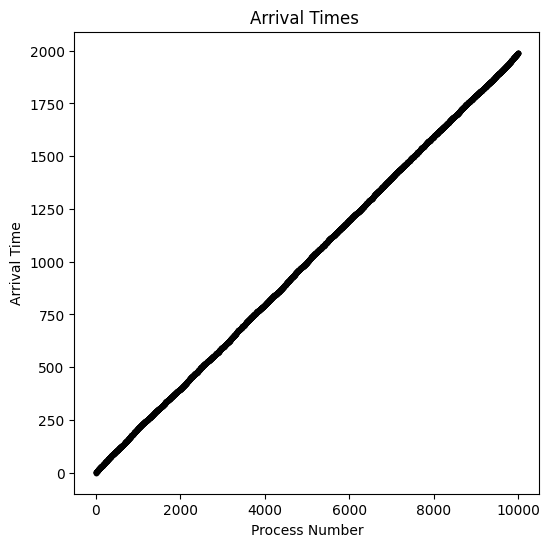

In [148]:
def plot_arrival_times(arrival_times):
    plt.figure(figsize=(6, 6))
    plt.plot(list(range(len(arrival_times))), arrival_times, marker=".", color="black", alpha=0.3)
    plt.xlabel("Process Number")
    plt.ylabel("Arrival Time")
    plt.title("Arrival Times ")
    plt.savefig("images/arrival_times.png")
    plt.show()

plot_arrival_times(arrival_times)

### Interarrival Times

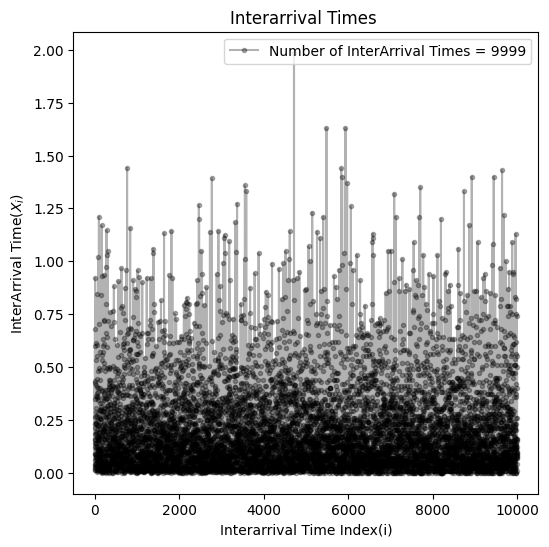

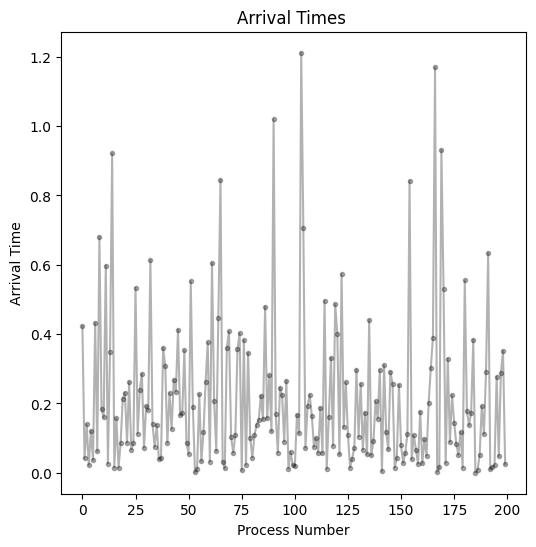

<Figure size 640x480 with 0 Axes>

In [147]:
def plot_interarrival_times(inter_arrival_times):
    plt.plot(list(range(len(inter_arrival_times))), inter_arrival_times, marker=".", color="black", alpha=0.3, label=f"Number of InterArrival Times = {len(inter_arrival_times)}")
    plt.xlabel("Interarrival Time Index(i)")
    plt.ylabel(r"InterArrival Time($X_{i}$)")
    plt.legend()
    plt.title("Interarrival Times ")

inter_arrival_times = np.array(arrival_times[1:])-np.array(arrival_times[:-1])

plt.figure(figsize=(6, 6))
plot_interarrival_times(inter_arrival_times)
plt.savefig("images/interarrival1.png")
plot_arrival_times(inter_arrival_times[:200])
plt.savefig("images/interarrival2.png")
# plt.show()

### E[T] and E[N]

E[T] = sum(Di - Ai)/t

In [121]:
mean_sojourn_times = []
mean_number_of_jobs_in_system_array = []
mean_sojourn_time = 0
sum_of_Di_minus_Ai = 0
time_elapsed = 0

for job_index in list(range(number_of_jobs)):
    Ai = arrival_times[job_index]
    Di = departure_times[job_index]
    time_elapsed=max(time_elapsed, Di)

    sum_of_Di_minus_Ai +=(Di-Ai)
    mean_sojourn_time= sum_of_Di_minus_Ai/float(job_index+1)
    mean_number_of_jobs = sum_of_Di_minus_Ai/float(time_elapsed)

    mean_sojourn_times.append(mean_sojourn_time)
    mean_number_of_jobs_in_system_array.append(mean_number_of_jobs)

print(f"Mean Sojourn Time = {mean_sojourn_time}")
print(f"Mean number of jobs in the system = {mean_number_of_jobs_in_system_array[-1]}")

Mean Sojourn Time = 3.1636789870999857
Mean number of jobs in the system = 15.855020031773325


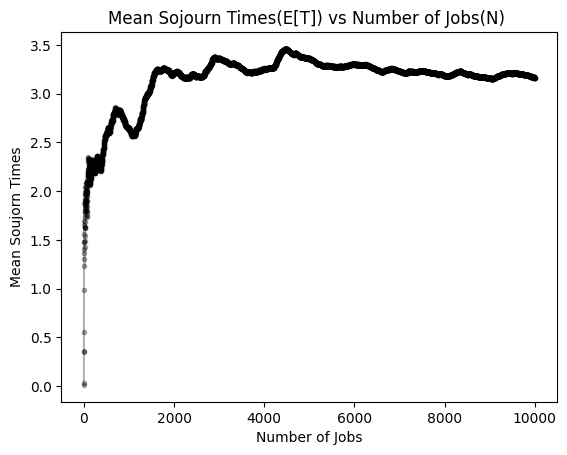

In [127]:
def plot_mean_sojourn_times(mean_sojourn_times):
    plt.plot(list(range(len(mean_sojourn_times))), mean_sojourn_times, marker=".", color="black", alpha=0.3)
    plt.xlabel("Number of Jobs")
    plt.ylabel("Mean Soujorn Times")
    # plt.legend()
    plt.title("Mean Sojourn Times(E[T]) vs Number of Jobs(N) ")
    plt.savefig("images/mean_sojourn_times.png")
    plt.show()

plot_mean_sojourn_times(mean_sojourn_times)

### Number of Pings

3.0297


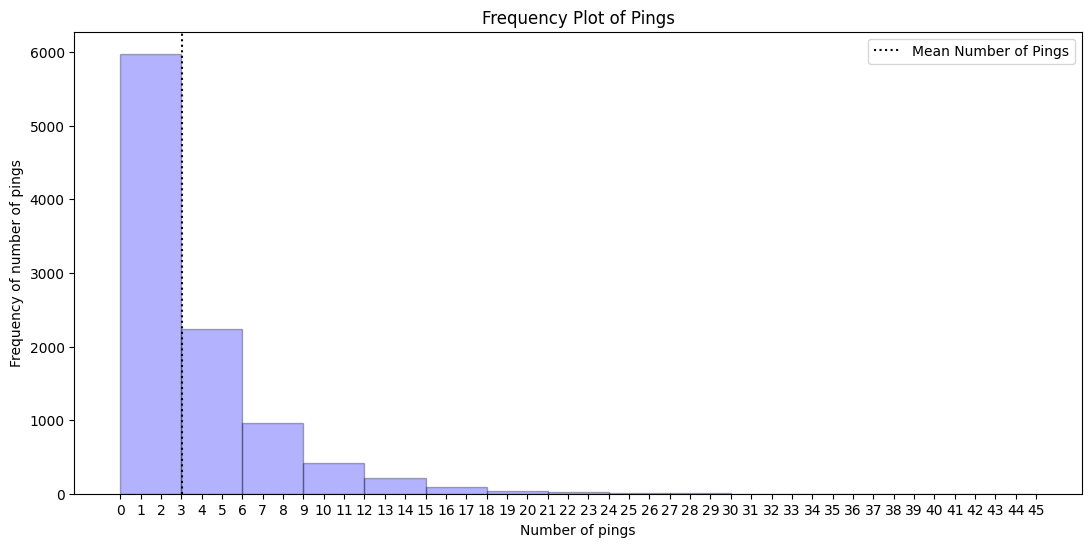

In [126]:
def plot_histogram(data_array, num_bins=10, mean=0):
    plt.figure(figsize=(13, 6))
    plt.hist(data_array, bins=num_bins, color='blue', edgecolor='black', alpha=0.3)
    plt.xlabel("Number of pings")
    plt.ylabel("Frequency of number of pings")
    plt.xticks(range(min(data_array), max(data_array) + 1))
    plt.title("Frequency Plot of Pings")
    plt.axvline(x=mean, color='black', linestyle='dotted', label='Mean Number of Pings')
    plt.legend()
    plt.savefig("images/frequency_plot_of_pings.png")
    plt.show()

mean_number_of_pings = np.mean(np.array(number_of_pings))
print(mean_number_of_pings)
plot_histogram(number_of_pings, num_bins=15, mean=mean_number_of_pings)

### E[N] vs E[T]

Find approximate slope

5.011576742274654


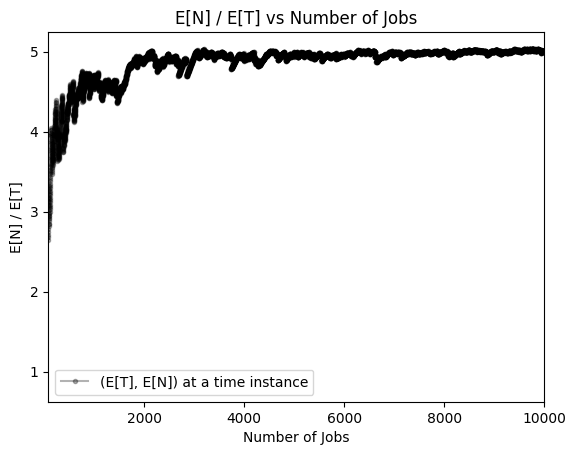

In [135]:
def plot_ratio_mean_jobs_mean_sojourn_times_with_time(mean_number_of_jobs_in_system_array, mean_sojourn_times):
    mean_sojourn_times = np.array(mean_sojourn_times)
    mean_number_of_jobs_in_system_array = np.array(mean_number_of_jobs_in_system_array)

    y_array = mean_number_of_jobs_in_system_array/mean_sojourn_times

    plt.plot(list(range(len(y_array))), y_array, marker=".", color="black", alpha=0.3, label="(E[T], E[N]) at a time instance")
    plt.xlabel("Number of Jobs")
    plt.ylabel("E[N] / E[T]")
    plt.xlim(75, len(y_array) + 1)
    plt.legend()
    plt.title("E[N] / E[T] vs Number of Jobs")
    plt.savefig("images/littles_law_verification.png")
    plt.show()

print(mean_number_of_jobs_in_system_array[-1]/mean_sojourn_times[-1])
plot_ratio_mean_jobs_mean_sojourn_times_with_time(mean_number_of_jobs_in_system_array, mean_sojourn_times)

### Blocking Probability

In [137]:
file_path = "file3.txt"

blocking_probability_array = []
with open(file_path, 'r') as file:
    for line in file:
        values = line.split()
        value1 = float(values[0])
        blocking_probability_array.append(value1)

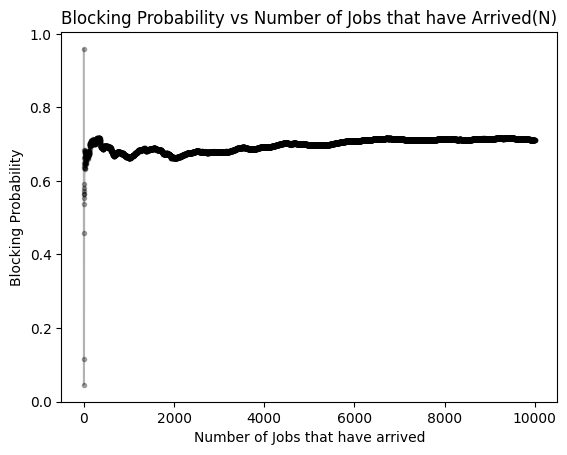

In [144]:
def plot_blocking_probability(blocking_probability_array):
    plt.plot(list(range(len(blocking_probability_array))), blocking_probability_array, marker=".", color="black", alpha=0.3)
    plt.xlabel("Number of Jobs that have arrived")
    plt.ylabel("Blocking Probability")
    plt.title("Blocking Probability vs Number of Jobs that have Arrived(N)")
    plt.savefig("images/blocking_probability.png")
    plt.show()

plot_blocking_probability(blocking_probability_array)